In [1]:
import pandas as pd 

In [2]:
x = 'ISIC_0028155'

In [8]:
a = x[7:]

In [9]:
int(a)

28155

In [10]:
a = {0:'a'}

In [11]:
a[0]

'a'

In [12]:
for i in range(2):
    print(i)

0
1


In [13]:
import cv2

In [17]:
def cutFace():
    #ファイル読み込み
    img = cv2.imread('./image.png')
    #グレースケール変換
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    facerect = cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=1, minSize=(1, 1))
    if len(facerect) > 0:
        #検出した顔を囲む矩形の作成
        for rect in facerect:
            x = rect[0]
            y = rect[1]
            width = rect[2]
            height = rect[3]
            #認識結果（顔）で画像を切り抜き
            new_img = img[y:y+height, x:x+width]
            new_path = f"./newimg.png"
            #認識結果の保存
            cv2.imwrite(new_path, new_img)

In [20]:
cascade_path = "/usr/local/opt/opencv/share/opencv4/haarcascades/haarcascade_frontalface_alt.xml"
#カスケード分類器の特徴量を取得する
cascade = cv2.CascadeClassifier(cascade_path)

In [21]:
cutFace()

In [22]:
a = {0:100}

In [25]:
type(a[0])

int

In [27]:
import numpy as np

In [34]:
a = np.ones((3,5,2))

In [35]:
b = np.zeros((10,3,5,2))

In [38]:
for i in range(10):
    b[i] += a * i

In [41]:
b[1]

array([[[3., 3.],
        [3., 3.],
        [3., 3.],
        [3., 3.],
        [3., 3.]],

       [[3., 3.],
        [3., 3.],
        [3., 3.],
        [3., 3.],
        [3., 3.]],

       [[3., 3.],
        [3., 3.],
        [3., 3.],
        [3., 3.],
        [3., 3.]]])

In [45]:
u = np.array([0, 1, 2]*3)

In [46]:
u

array([0, 1, 2, 0, 1, 2, 0, 1, 2])

In [ ]:
24:53

In [11]:
import numpy as np

In [25]:
array = np.array([[1,2,3,4],[4,5,6,7],[7,8,9,10],[10,11,12,13]])

In [26]:
array

array([[ 1,  2,  3,  4],
       [ 4,  5,  6,  7],
       [ 7,  8,  9, 10],
       [10, 11, 12, 13]])

In [27]:
width = array.shape[1]
height = array.shape[0]

In [21]:
width

3

In [35]:
ar = array[1:3]

In [37]:
ar

array([[ 4,  5,  6,  7],
       [ 7,  8,  9, 10]])

In [42]:
ar.T[1:3].T

array([[5, 6],
       [8, 9]])

In [43]:
def crop(img):
    arr1 = array[((height-2)//2):((height+2)//2)]
    return arr1.T[((width-2)//2):((width+2)//2)].T

In [44]:
cropped = crop(array)

In [45]:
cropped

array([[5, 6],
       [8, 9]])

In [47]:
arr = np.array([[1,2,3,4],[4,5,6,7],[7,8,9,10],[10,11,12,13]],[[14,15,16,17],[18,19,20,21],[22,23,24,25],[26,27,28,29]])

In [52]:
arr.T.shape

(4, 4, 2)

In [53]:
a = np.zeros((3,4,2))

In [70]:
b=a.T[0][1:3].T

In [75]:
a[0:3, 1:3].shape

(3, 2, 2)

In [65]:
b.T.shape

(3, 2)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import load_model

Using TensorFlow backend.
/Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/m

In [18]:
cancer_labels = {0:'nv', 1:'mel', 2:'bcc'}
model = load_model('nv_cancer_cnn_raw_female2.h5')
def resize(img):
    width, height = img.shape[1], img.shape[0]
    arr1 = img[((height-75)//2):((height+75)//2),((width-100)//2):((width+100)//2)]
    return arr1

def predict(img):
    data = (img - np.mean(img)) / np.std(img)
    data = data.reshape((1,75,100,3))
    pred = model.predict(data)
    bestnum = 0.0
    bestclass = 0
    print(pred)
    for n in [0,1,2]:
        if bestnum < pred[0][n]:
            bestnum = pred[0][n]
            bestclass = n
    return bestclass

In [16]:
img = np.array(Image.open('nv1.jpg'))
res = resize(img)
num = predict(res)
print(cancer_labels[num])
plt.imshow(res)img = np.array(Image.open('nv1.jpg'))
res = resize(img)
num = predict(res)
print(cancer_labels[num])
plt.imshow(res)
plt.show()

NameError: name 'im' is not defined

[[9.9285007e-01 1.7026863e-04 6.9795824e-03]]
nv


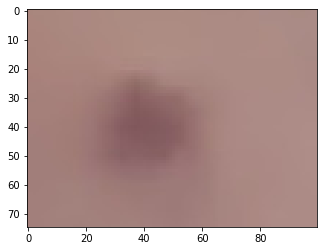

In [25]:
img = np.array(Image.open('scr.jpg'))
res = resize(img)
num = predict(res)
print(cancer_labels[num])
plt.imshow(res)
plt.show()

In [33]:
img.T[0]

array([[170, 170, 170, ..., 162, 162, 162],
       [168, 168, 170, ..., 162, 162, 162],
       [169, 169, 168, ..., 162, 162, 162],
       ...,
       [169, 169, 170, ..., 172, 172, 172],
       [170, 170, 170, ..., 172, 172, 172],
       [170, 170, 170, ..., 172, 172, 172]], dtype=uint8)

In [29]:
res[0]

array([[170, 133, 125],
       [168, 134, 125],
       [169, 135, 126],
       [169, 135, 126],
       [169, 135, 126],
       [169, 135, 126],
       [169, 135, 126],
       [169, 135, 126],
       [169, 135, 126],
       [169, 135, 126],
       [170, 136, 127],
       [170, 136, 127],
       [170, 136, 127],
       [171, 137, 128],
       [171, 137, 128],
       [171, 137, 128],
       [171, 136, 130],
       [171, 136, 130],
       [171, 136, 130],
       [171, 136, 130],
       [171, 136, 130],
       [171, 136, 130],
       [171, 137, 128],
       [171, 137, 128],
       [172, 138, 129],
       [172, 138, 129],
       [172, 138, 129],
       [171, 138, 129],
       [171, 138, 129],
       [171, 138, 129],
       [172, 140, 129],
       [172, 140, 129],
       [172, 139, 130],
       [172, 139, 130],
       [172, 139, 130],
       [172, 139, 130],
       [172, 139, 130],
       [172, 139, 130],
       [172, 139, 130],
       [172, 139, 130],
       [172, 139, 130],
       [172, 139